In [76]:
from keras import models
from keras import layers
from keras import metrics
from keras import optimizers
from keras import losses
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np

In [8]:
(x_train,y_train),(x_test,y_test),=imdb.load_data(num_words=10000)

In [36]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(key,value)  for (value,key) in word_index.items()])
decode_review=' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])

In [37]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [65]:
def one_hot(seqs,dim=10000):
    res=np.zeros((len(seqs),dim))
    for i,seq in enumerate(seqs): 
        res[i,seq]=1 #res [0,[1,14,22]]=1
    return res

In [66]:
x_train=one_hot(x_train)
x_test=one_hot(x_test)

In [69]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [73]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [74]:
x_val=x_train[:1000]
x_train=x_train[1000:]
y_val=y_train[:1000]
y_train=y_train[1000:]

In [75]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=512)


Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 3s 112us/step - loss: 0.4484 - binary_accuracy: 0.8211 - val_loss: 0.3150 - val_binary_accuracy: 0.8780
Epoch 2/20
24000/24000 [==============================] - 2s 90us/step - loss: 0.2590 - binary_accuracy: 0.9087 - val_loss: 0.2600 - val_binary_accuracy: 0.8880
Epoch 3/20
24000/24000 [==============================] - 2s 90us/step - loss: 0.1988 - binary_accuracy: 0.9300 - val_loss: 0.2506 - val_binary_accuracy: 0.8880
Epoch 4/20
24000/24000 [==============================] - 2s 91us/step - loss: 0.1662 - binary_accuracy: 0.9418 - val_loss: 0.2559 - val_binary_accuracy: 0.8900
Epoch 5/20
24000/24000 [==============================] - 2s 90us/step - loss: 0.1414 - binary_accuracy: 0.9509 - val_loss: 0.2655 - val_binary_accuracy: 0.8900
Epoch 6/20
24000/24000 [==============================] - 2s 90us/step - loss: 0.1207 - binary_accuracy: 0.9586 - val_loss: 0.2827 - val_binary_a

In [79]:
history.history

{'val_loss': [0.31504660081863406,
  0.260041298866272,
  0.25061115860939026,
  0.25593007969856263,
  0.26549073433876036,
  0.2826581370830536,
  0.2988453028202057,
  0.3188628635406494,
  0.3482944805622101,
  0.37012290382385254,
  0.42044245290756227,
  0.45561042523384093,
  0.4632089018821716,
  0.49988642406463624,
  0.5253621983528137,
  0.6614970064163208,
  0.6182604417800903,
  0.6338753657341003,
  0.6695510978698731,
  0.696864221572876],
 'val_binary_accuracy': [0.8779999961853028,
  0.8879999866485596,
  0.8879999866485596,
  0.8899999866485596,
  0.8900000023841858,
  0.8950000109672547,
  0.8919999976158142,
  0.8889999976158142,
  0.8799999866485596,
  0.8789999866485596,
  0.875,
  0.8720000133514404,
  0.8740000023841857,
  0.8730000023841857,
  0.8779999952316284,
  0.865,
  0.869,
  0.8670000047683716,
  0.8690000047683716,
  0.876],
 'loss': [0.4483582595984141,
  0.25903034218152365,
  0.19879174586137136,
  0.1662466961145401,
  0.141367928703626,
  0.120663

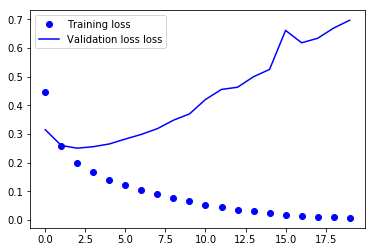

In [87]:
plt.plot(history.epoch,history.history['loss'],'bo',label='Training loss')
plt.plot(history.epoch,history.history['val_loss'],'b',label='Validation loss loss')
plt.legend()

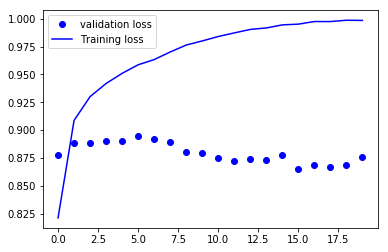

In [88]:
plt.plot(history.epoch,history.history['val_binary_accuracy'],'bo',label='validation loss')
plt.plot(history.epoch,history.history['binary_accuracy'],'b',label='Training loss')
plt.legend()

In [89]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5,batch_size=512)


Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 2s 90us/step - loss: 0.0079 - binary_accuracy: 0.9979 - val_loss: 0.7120 - val_binary_accuracy: 0.8740
Epoch 2/5
24000/24000 [==============================] - 2s 90us/step - loss: 0.0078 - binary_accuracy: 0.9979 - val_loss: 0.7431 - val_binary_accuracy: 0.8740
Epoch 3/5
24000/24000 [==============================] - 2s 90us/step - loss: 0.0018 - binary_accuracy: 0.9999 - val_loss: 0.7635 - val_binary_accuracy: 0.8750
Epoch 4/5
24000/24000 [==============================] - 2s 90us/step - loss: 0.0047 - binary_accuracy: 0.9987 - val_loss: 0.7817 - val_binary_accuracy: 0.8730
Epoch 5/5
24000/24000 [==============================] - 2s 90us/step - loss: 0.0041 - binary_accuracy: 0.9989 - val_loss: 0.8440 - val_binary_accuracy: 0.8730


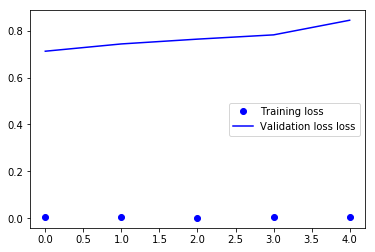

In [90]:
plt.plot(history.epoch,history.history['loss'],'bo',label='Training loss')
plt.plot(history.epoch,history.history['val_loss'],'b',label='Validation loss loss')
plt.legend()

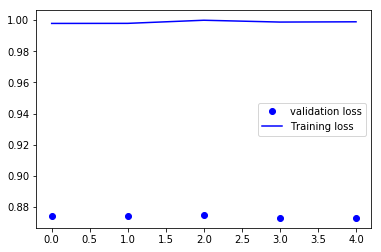

In [91]:
plt.plot(history.epoch,history.history['val_binary_accuracy'],'bo',label='validation loss')
plt.plot(history.epoch,history.history['binary_accuracy'],'b',label='Training loss')
plt.legend()